In [1]:
from netcdf_editor_app.utils import LMDZOR

In [2]:
import xarray as xr
import holoviews as hv
import hvplot.xarray

import matplotlib.pyplot as plt

In [3]:
ds = xr.open_dataset('~/Downloads/WESLEY/60Ma_bil_netcdf-editor.nc')
ds

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lon      (lon) float64 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
Data variables:
    topo     (lat, lon) float64 ...
Attributes:
    CDI:          Climate Data Interface version 1.7.2 (http://mpimet.mpg.de/...
    Conventions:  COARDS, CF-1.5
    title:        Produced by grdconvert
    description:  Grid reconstructed using R[lon lat omega] = 125.3 0 17.1
    GMT_version:  5.4.4 (r20314) [64-bit] [MP]
    CDO:          Climate Data Operators version 1.7.2rc6 (http://mpimet.mpg....
    history:      Wed Dec  2 12:36:59 2020: ncrename -v z,topo 60Ma_bil.nc\nW...
    NCO:          "4.6.0"

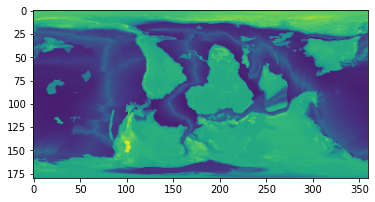

In [4]:
topo = LMDZOR.fix_topo(ds.topo.values, ds.lat.values)
plt.imshow(topo)

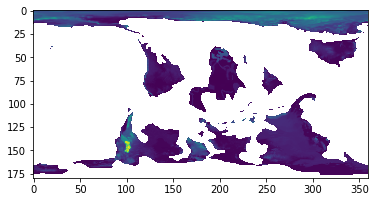

In [5]:
orog = LMDZOR.calculate_orog(topo)
plt.imshow(orog)

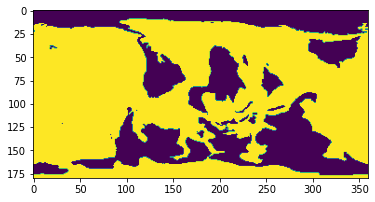

In [6]:
omsk = LMDZOR.calculate_omsk(topo)
plt.imshow(omsk)

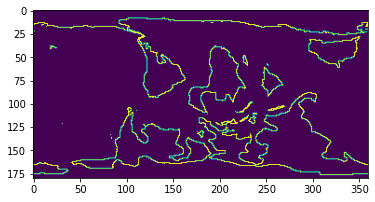

In [7]:
cmsk = LMDZOR.calculate_cmsk(omsk)
plt.imshow(cmsk)

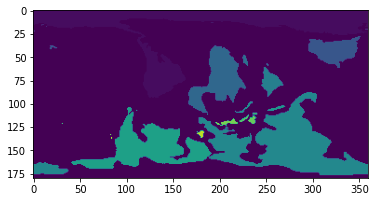

In [8]:
continents = LMDZOR.calculate_continents(topo, omsk)
plt.imshow(continents)

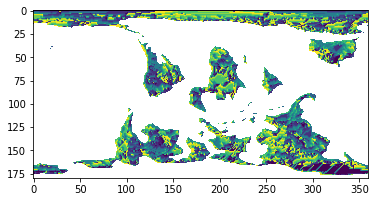

In [9]:
trip = LMDZOR.calculate_trip(topo, omsk)
plt.imshow(trip)

In [10]:
rlon, rlat = LMDZOR.calculate_curvilinear_coordinates()

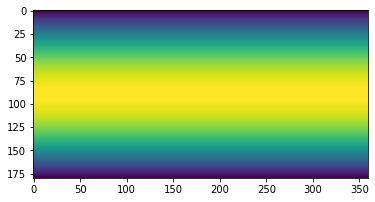

In [11]:
area = LMDZOR.calculate_area(rlat)
plt.imshow(area)

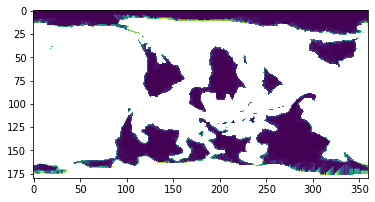

In [12]:
basins = LMDZOR.calculate_basins(topo, trip, area)
plt.imshow(basins)

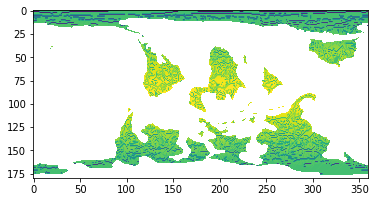

In [13]:
ocean_distances = LMDZOR.calculate_ocean_distances(trip, rlat)
plt.imshow(ocean_distances)

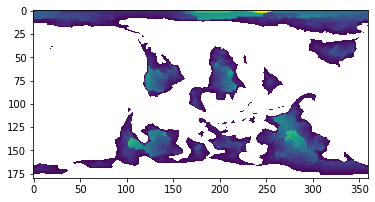

In [14]:
river_length = LMDZOR.calculate_river_lengths(topo, trip, ocean_distances, omsk)
plt.imshow(river_length)

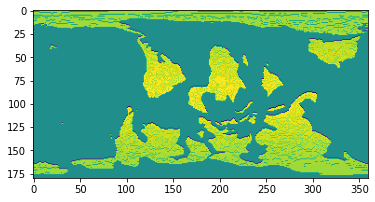

In [15]:
distbox = LMDZOR.calculate_distbox(river_length, trip)
plt.imshow(distbox)

In [16]:
outflow_points = LMDZOR.calculate_outflow_points(basins, trip)

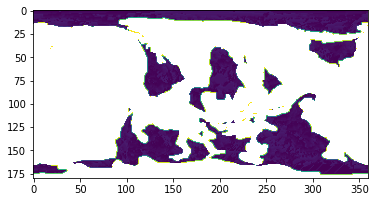

In [17]:
trip = LMDZOR.calculate_trip_outflow_values(trip, outflow_points, basins, omsk, rlat)
plt.imshow(trip)

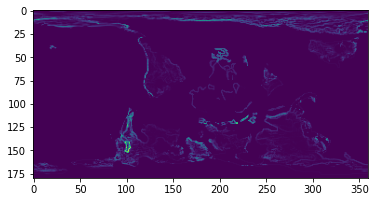

In [18]:
dzz = LMDZOR.calculate_dzz(topo, trip, distbox, omsk)
plt.imshow(dzz)

/Users/wesleybanfield/Repos/netcdf_editor_app/netcdf_editor_app/utils/LMDZOR.py:586: RuntimeWarning: divide by zero encountered in true_divide
  topoindex = numpy.sqrt(distbox**3. / (dzz * 10 ** 6))
/Users/wesleybanfield/Repos/netcdf_editor_app/netcdf_editor_app/utils/LMDZOR.py:586: RuntimeWarning: invalid value encountered in true_divide
  topoindex = numpy.sqrt(distbox**3. / (dzz * 10 ** 6))
/Users/wesleybanfield/Repos/netcdf_editor_app/netcdf_editor_app/utils/LMDZOR.py:586: RuntimeWarning: invalid value encountered in sqrt
  topoindex = numpy.sqrt(distbox**3. / (dzz * 10 ** 6))


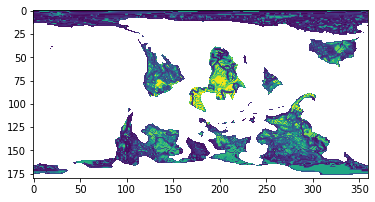

In [19]:
topo_index = LMDZOR.calculate_topo_index(distbox, dzz, omsk)
plt.imshow(topo_index)

In [20]:
topo, latitudes = ds.topo.values, ds.lat.values

In [21]:
%%timeit
LMDZOR.run_routines(topo, latitudes)

4.87 s ± 232 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
